In [23]:
from utils import * 
from algorithms import *
from agents import *

In [24]:
numRounds, numPeriods, numSteps = 100, 1, 25
numBuyers, numSellers, numTokens = 4, 4, 4
gameTypes, seed = '1111', None
gameData = [gameTypes, numBuyers, numSellers, numTokens, numRounds, numPeriods, numSteps, seed]
disclosure = ['step', 'currentBid', 'currentAsk', 'buy', 'sell', 'price', 'sale',
              'currentBidIdx_0', 'currentBidIdx_1', 'currentBidIdx_2', 'currentBidIdx_3',
              'currentAskIdx_0', 'currentAskIdx_1', 'currentAskIdx_2', 'currentAskIdx_3',
              'bids_0', 'bids_1', 'bids_2', 'bids_3',
              'asks_0', 'asks_1', 'asks_2', 'asks_3']
depth = 1
buyers = [ZeroIntelligence(gameData, disclosure, index=0, buyer=1, reinforcer=0),
          ZeroIntelligence(gameData, disclosure, index=0, buyer=1, reinforcer=0),
          ZeroIntelligence(gameData, disclosure, index=0, buyer=1, reinforcer=0),
          ZeroIntelligence(gameData, disclosure, index=0, buyer=1, reinforcer=0)]
sellers = [ZeroIntelligence(gameData, disclosure, index=0, buyer=0, reinforcer=0),
           ZeroIntelligence(gameData, disclosure, index=0, buyer=0, reinforcer=0),
           ZeroIntelligence(gameData, disclosure, index=0, buyer=0, reinforcer=0),
           ZeroIntelligence(gameData, disclosure, index=0, buyer=0, reinforcer=0)]
log = Log(gameData, disclosure,depth)
rnd = 0
state_record = []
reward_record = []

In [25]:
for rnd in range(numRounds):
    print(rnd)
    startRounds(gameData, log, buyers, sellers, rnd)
    for period in range(numPeriods):
        startPeriods(buyers, sellers)
        for step in range(numSteps):
            startSteps(buyers, sellers)
            #buyers[0].state = generateState(buyers[0], disclosure, depth)
            bids, asks = collectOffers(buyers, sellers)
            currentAsk, currentAskIdx, currentBid, currentBidIdx = bestOffers(bids, asks)
            price, buy, sell = trade(buyers, sellers, currentAsk, currentAskIdx, currentBid, currentBidIdx)
            bprofit, sprofit = 0, 0
            if price > 0:
                buyers[currentBidIdx].transact(price)
                sellers[currentAskIdx].transact(price)
                bprofit = buyers[currentBidIdx].stepProfits
                sprofit = sellers[currentAskIdx].stepProfits
            reward_record.append(buyers[0].stepProfits)
            log.addStep([rnd, period, step, currentBid, currentAsk,  buy, sell, price, price>0,
                         currentBidIdx==0, currentBidIdx==1, currentBidIdx==2, currentBidIdx==3, 
                         currentAskIdx==0, currentAskIdx==1, currentAskIdx==2, currentAskIdx==3, 
                         bids[0], bids[1], bids[2], bids[3], 
                         asks[0], asks[1], asks[2], asks[3], 
                         bprofit, sprofit])
            observe(buyers, sellers, log.disclose())
            agentsObserve(buyers, sellers)
            agentsTrain(buyers, sellers)
            endSteps(buyers, sellers)
            state_record.append([step, buyers[0].periodTrades, bids[0], bids[1], bids[2], bids[3], asks[0], asks[1], asks[2], asks[3], currentBid, currentBidIdx, currentAsk, currentAskIdx, buy, sell, price, price>0])
        endPeriods(buyers, sellers)
    endRounds(buyers, sellers)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [26]:
log.roundData.buyerSurplus.mean(), log.roundData.sellerSurplus.mean()

(238.28499999999997, 239.247)

In [27]:
log.roundData.buyerSurplus.std()

28.83360965010356

In [28]:
state_record[0]

[0,
 0,
 66.5,
 47.7,
 80.6,
 86.1,
 45.2,
 50.8,
 55.6,
 55.8,
 86.1,
 3,
 45.2,
 0,
 True,
 True,
 65.65,
 True]

In [29]:
states = np.array(state_record)
cols = ['step', 'sales', 'bids1','bids2','bids3','bids4', 'asks1','asks2','asks3','asks4', 'currentBid', 'currentBidIdx','currentAsk', 'currentAskIdx', 'buy', 'sell', 'price', 'sale']
mean_df = pd.DataFrame(np.mean(states,axis=0).reshape(1,-1), columns = cols)
mean_df.to_csv('mean_state.csv')
cols = ['step', 'sales', 'bids1','bids2','bids3','bids4', 'asks1','asks2','asks3','asks4', 'currentBid', 'currentBidIdx','currentAsk', 'currentAskIdx', 'buy', 'sell', 'price', 'sale']
std_df = pd.DataFrame(np.std(states,axis=0).reshape(1,-1), columns = cols)
std_df.to_csv('std_state.csv')

In [30]:
log.findCurrentTraders()

In [31]:
log.stepData.tail(1000)[['currentBidIdx', 'bprofit']].groupby('currentBidIdx').sum()/log.stepData.tail(1000).period.nunique()

,bprofit
currentBidIdx,
0,2582.926865
1,2532.108142
2,2492.379919
3,2554.849412


In [32]:
log.stepData.tail(1000)[['currentAskIdx', 'bprofit']].groupby('currentAskIdx').sum()/log.stepData.tail(1000).period.nunique()

,bprofit
currentAskIdx,
0,2530.660376
1,2463.847061
2,2501.944545
3,2665.812355


In [39]:
log.getPeriod(1, 0)

,rnd,period,step,currentBid,currentAsk,buy,sell,price,sale,currentBidIdx_0,...,bids_2,bids_3,asks_0,asks_1,asks_2,asks_3,bprofit,sprofit,currentBidIdx,currentAskIdx
25,1,0,0,89.3,47.8,True,True,68.55,True,False,...,82.8,89.3,53.4,51.1,66.4,47.8,21.893262,20.992704,3,3
26,1,0,1,75.1,44.7,True,True,59.90,True,True,...,62.9,56.4,44.7,59.9,63.1,55.4,20.500174,17.513286,0,0
27,1,0,2,91.5,54.8,True,True,73.15,True,False,...,58.4,83.2,60.4,54.8,79.1,65.3,18.952900,26.177821,1,1
28,1,0,3,75.1,56.4,True,True,65.75,True,True,...,70.3,64.5,56.4,61.6,81.4,71.1,14.159403,22.161927,0,0
29,1,0,4,83.4,49.0,True,True,66.20,True,False,...,83.4,46.0,65.1,49.0,67.5,67.8,17.573643,19.065964,2,1
30,1,0,5,80.2,54.6,True,True,67.40,True,False,...,80.2,48.6,59.6,62.3,75.4,54.6,14.741236,16.261826,2,3
31,1,0,6,83.6,55.0,True,True,69.30,True,False,...,68.1,83.6,55.0,56.0,66.9,63.2,15.315920,20.867458,3,0
32,1,0,7,76.8,52.0,True,True,64.40,True,True,...,42.4,75.5,52.0,71.9,77.3,73.8,13.376889,13.933432,0,0
33,1,0,8,75.1,62.9,True,True,69.00,True,False,...,75.1,47.9,NaN,65.9,62.9,68.0,10.866099,14.005349,2,2
34,1,0,9,75.8,73.4,True,True,74.60,True,False,...,52.6,75.8,NaN,73.4,76.2,79.5,8.124542,23.380773,1,1


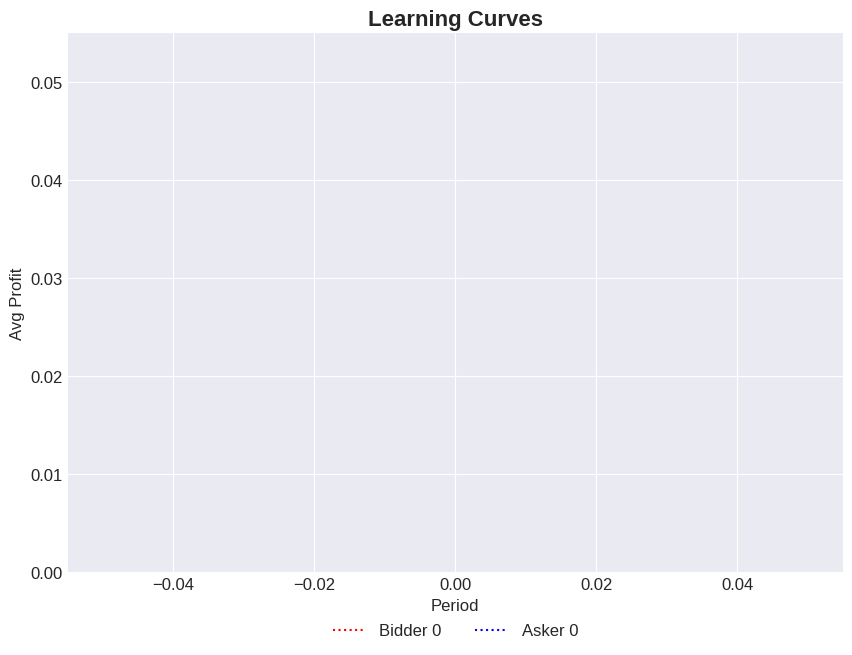

In [40]:
log.graphLearning(rolling_window = 10, trackBuyersIdx=[0], trackSellersIdx=[0])

AttributeError: 'DataFrame' object has no attribute 'bids'

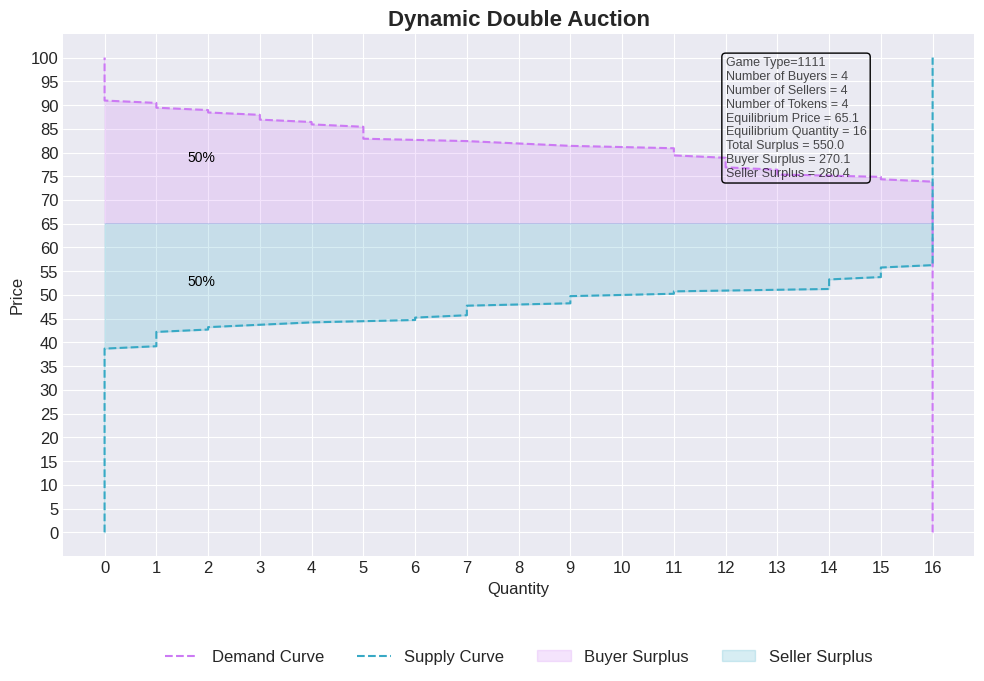

In [41]:
log.graphSales(0, period-1, trackBuyersIdx=[0], trackSellersIdx=[0])

In [42]:
log.stepData.tail(15)

,rnd,period,step,currentBid,currentAsk,buy,sell,price,sale,currentBidIdx_0,...,bids_2,bids_3,asks_0,asks_1,asks_2,asks_3,bprofit,sprofit,currentBidIdx,currentAskIdx
2485,99,0,10,62.4,52.7,True,True,57.55,True,True,...,46.9,NaN,52.7,56.1,NaN,NaN,25.504902,11.439331,0,0
2486,99,0,11,58.6,56.3,True,True,57.45,True,False,...,47.9,NaN,56.3,58.7,NaN,NaN,14.430744,10.199237,1,0
2487,99,0,12,70.4,54.4,True,True,62.40,True,False,...,70.4,NaN,69.0,54.4,NaN,NaN,13.544556,11.819860,2,1
2488,99,0,13,53.7,67.1,True,True,60.40,True,True,...,NaN,NaN,76.0,67.1,NaN,NaN,16.036586,9.703785,0,1
2489,99,0,14,57.2,62.3,True,True,59.75,True,True,...,NaN,NaN,75.7,62.3,NaN,NaN,13.012822,5.460094,0,1
2490,99,0,15,57.3,66.1,True,False,66.10,True,True,...,NaN,NaN,66.1,NaN,NaN,NaN,5.485468,8.127621,0,0
2491,99,0,16,NaN,NaN,NaN,NaN,NaN,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0,0
2492,99,0,17,NaN,NaN,NaN,NaN,NaN,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0,0
2493,99,0,18,NaN,NaN,NaN,NaN,NaN,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0,0
2494,99,0,19,NaN,NaN,NaN,NaN,NaN,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0,0


In [43]:
log.getPeriod(0, period-1).sum()

rnd                  0
period               0
step                 0
currentBid         0.0
currentAsk         0.0
buy                  0
sell                 0
price              0.0
sale                 0
currentBidIdx_0      0
currentBidIdx_1      0
currentBidIdx_2      0
currentBidIdx_3      0
currentAskIdx_0      0
currentAskIdx_1      0
currentAskIdx_2      0
currentAskIdx_3      0
bids_0             0.0
bids_1             0.0
bids_2             0.0
bids_3             0.0
asks_0             0.0
asks_1             0.0
asks_2             0.0
asks_3             0.0
bprofit            0.0
sprofit            0.0
currentBidIdx        0
currentAskIdx        0
dtype: object

In [44]:
log.graphOffers(0, period-1, trackBuyersIdx=[0], trackSellersIdx=[0])

AttributeError: 'DataFrame' object has no attribute 'bids'

ValueError: range() arg 3 must not be zero

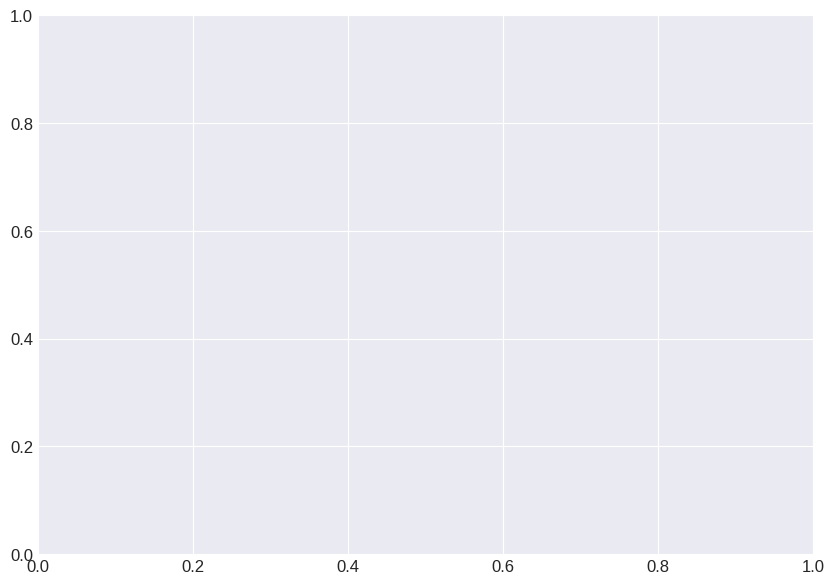

In [45]:
log.graphTraining(maxNumPeriods=period-1, skip = int((period-1)/20), trackBuyersIdx = [0])